## カートポールスケート

> **問題**: ピーターがオオカミから逃げたい場合、オオカミより速く動ける必要があります。ここでは、ピーターがスケートを学び、特にバランスを保つ方法をQ学習を使って見ていきます。

まず、gymをインストールし、必要なライブラリをインポートしましょう:


In [1]:
#code block 1

## カートポール環境を作成する


In [ ]:
#code block 2

環境がどのように機能するかを見るために、100ステップの短いシミュレーションを実行してみましょう。


In [ ]:
#code block 3

シミュレーション中、行動を決定するために観測を取得する必要があります。実際には、`step` 関数は現在の観測値、報酬関数、およびシミュレーションを続行する意味があるかどうかを示す `done` フラグを返します。


In [ ]:
#code block 4

これらの数値の最小値と最大値を取得できます:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

他のビンを使用した離散化方法も探ってみましょう。


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


では、短いシミュレーションを実行し、それらの離散的な環境値を観察しましょう。


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-テーブル構造


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


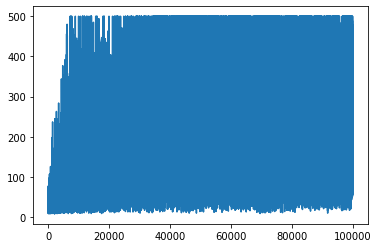

In [20]:
plt.plot(rewards)

このグラフからは何も判断することはできません。なぜなら、確率的なトレーニングプロセスの性質上、トレーニングセッションの長さが大きく異なるからです。このグラフをより理解しやすくするために、例えば100回の実験にわたる**移動平均**を計算することができます。これには`np.convolve`を便利に使用することができます。


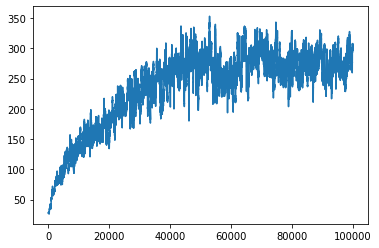

In [22]:
#code block 12

## ハイパーパラメータを変えて結果を確認する

さて、実際に学習済みモデルがどのように動作するかを見るのは興味深いですね。シミュレーションを実行してみましょう。トレーニング中と同じ行動選択戦略を使用します。つまり、Q-Tableの確率分布に基づいてサンプリングを行います。


In [23]:
# code block 13

## 結果をアニメーションGIFとして保存する

友達を驚かせたい場合、バランス棒のアニメーションGIF画像を送るのがおすすめです。そのためには、`env.render`を呼び出して画像フレームを生成し、それをPILライブラリを使ってアニメーションGIFとして保存します。


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**免責事項**:  
この文書は、AI翻訳サービス [Co-op Translator](https://github.com/Azure/co-op-translator) を使用して翻訳されています。正確性を追求しておりますが、自動翻訳には誤りや不正確な部分が含まれる可能性があります。元の言語で記載された文書が正式な情報源とみなされるべきです。重要な情報については、専門の人間による翻訳を推奨します。この翻訳の使用に起因する誤解や誤った解釈について、当方は責任を負いません。
